In [1]:
library(GSEABase)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [2]:
library(GSVA)
library(limma)

Warning message:
“multiple methods tables found for ‘which’”

Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [3]:
df<-read.csv(file='0828-normalizedcounts.csv')

In [4]:
rownames(df)<-df$X
df$X<-NULL

In [5]:
##读取Geneset
geneSets <- getGmt("c2.cp.reactome.v7.4.symbols.gmt")

In [6]:
df<-as.matrix(df)

In [7]:
df<-df[,1:29]

In [8]:
##运行GSVA，返回二项式分布的结果
res_es <- gsva(df, geneSets, min.sz=10, max.sz=500, verbose=FALSE, kcdf="Gaussian",method = "gsva",parallel.sz=1)

Warning message in .filterFeatures(expr, method):
“625 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


In [9]:
selected<-c('REACTOME_DISEASES_ASSOCIATED_WITH_GLYCOSYLATION_PRECURSOR_BIOSYNTHESIS','REACTOME_DISEASES_OF_CARBOHYDRATE_METABOLISM','REACTOME_TP53_REGULATES_METABOLIC_GENES','REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT','REACTOME_PROTEIN_LOCALIZATION','REACTOME_DISEASES_ASSOCIATED_WITH_N_GLYCOSYLATION_OF_PROTEINS')

In [10]:
draw<-res_es[selected,]

In [11]:
options(repr.plot.height=10,repr.plot.width=10)

In [12]:
annocol<-t(df[c('CCND1','CD79A','CCND2','GAPDH'),])

In [13]:
clustergroup<-c(2,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,2,0,1,0,2,1,0,0,0)
annocol2<-cbind(annocol,clustergroup)

In [14]:
annocol2<-as.data.frame(annocol2[colnames(draw),])

In [15]:
options(repr.plot.height=20,repr.plot.width=15)

Loading required package: viridisLite



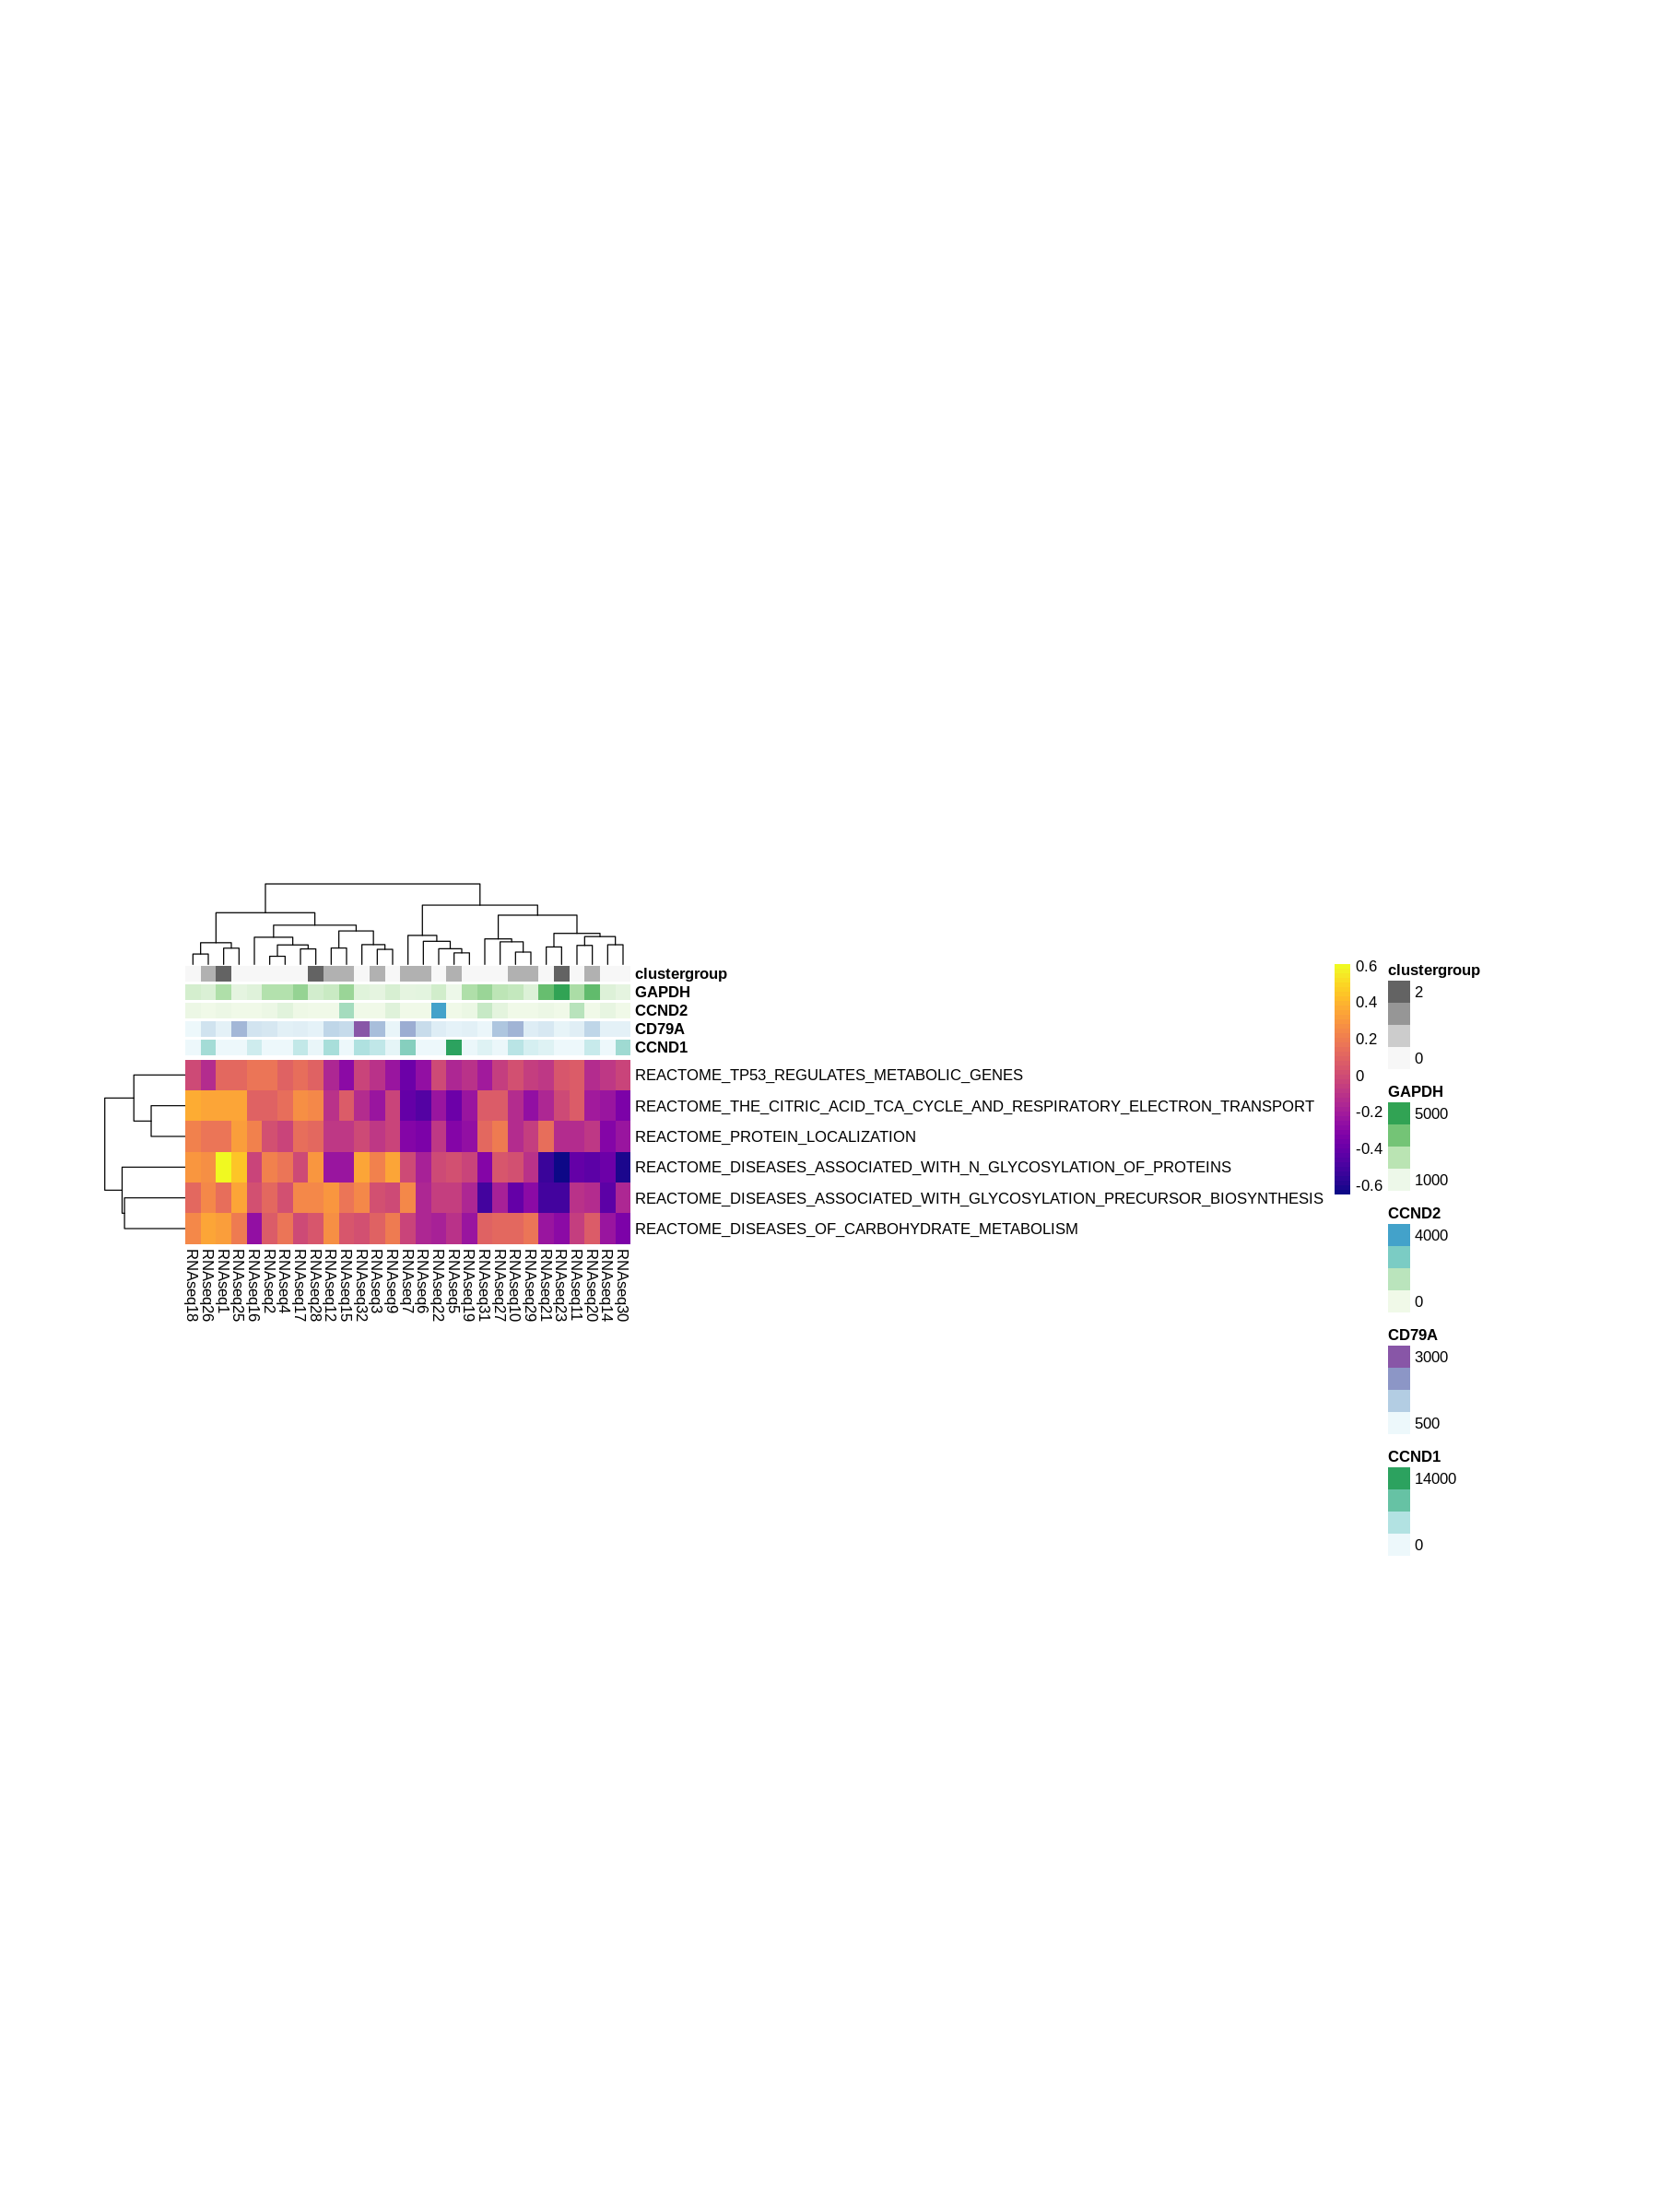

In [16]:
library(pheatmap)
library(viridis)
pheatmap(draw, cluster_cols = T,scale="none",border=FALSE,color=plasma(50),cellheight=20,cellwidth=10,fontsize=10,annotation_col=annocol2)

In [17]:
pheatmap(draw, cluster_cols = T,scale="none",border=FALSE,filename='fig.5.8.pdf',color=plasma(50),cellheight=20,cellwidth=10,fontsize=10,annotation_col=annocol2)

In [18]:
draw3<-cbind(t(draw),annocol2)

In [19]:
draw3

,REACTOME_DISEASES_ASSOCIATED_WITH_GLYCOSYLATION_PRECURSOR_BIOSYNTHESIS,REACTOME_DISEASES_OF_CARBOHYDRATE_METABOLISM,REACTOME_TP53_REGULATES_METABOLIC_GENES,REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT,REACTOME_PROTEIN_LOCALIZATION,REACTOME_DISEASES_ASSOCIATED_WITH_N_GLYCOSYLATION_OF_PROTEINS,CCND1,CD79A,CCND2,GAPDH,clustergroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RNAseq1,0.14470255,0.311551453,0.105404145,0.334236453,0.158785558,0.607334456,141.367496,223.09558,112.652223,2783.1726,2
RNAseq2,0.10609642,0.075213612,0.170195259,0.090110975,0.004923816,0.225241024,0.000000,487.16384,106.335255,2658.3814,0
RNAseq3,0.01866779,0.094418639,-0.122290950,-0.249673143,-0.096468168,0.204859209,3967.010588,1435.82741,4.012292,1110.2586,1
RNAseq4,0.01982726,0.154921660,0.091222247,0.149049279,-0.027175202,0.177180917,0.000000,253.84334,408.356679,2654.3184,0
RNAseq5,-0.06916296,-0.117613790,-0.172193498,-0.378081329,-0.309867811,0.013134474,15531.519906,209.45259,6.608941,847.4696,1
RNAseq6,-0.17318609,-0.162789183,-0.259647394,-0.461510976,-0.345211587,-0.175320561,32.486544,753.68783,5.197847,1166.2669,1
RNAseq7,0.23636623,-0.032140759,-0.383544087,-0.417880453,-0.325824558,-0.017309092,8123.944742,1759.47279,4.951612,1124.0159,1
RNAseq9,-0.01666496,0.184741819,-0.246955723,-0.029695824,-0.039103269,0.330298683,694.242860,141.63483,428.387316,1553.3394,0
RNAseq10,-0.41712277,0.117138766,0.020447653,-0.126205109,-0.125283606,0.009977227,4526.403412,1640.30080,2.066986,2147.3029,1


In [20]:
options(repr.plot.height=5,repr.plot.width=3)

In [21]:
my_comparisons<-list(c("0","1"),c("0","2"),c("1","2"))

Loading required package: ggplot2



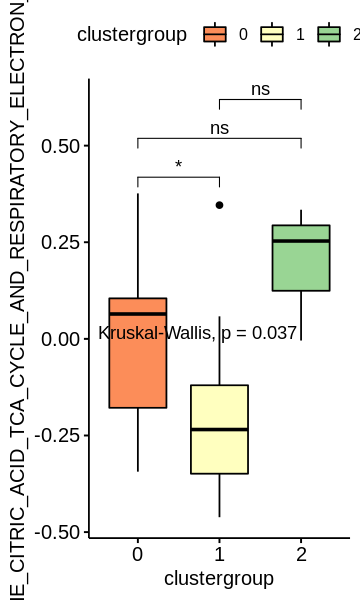

In [22]:
library(ggpubr)
library(RColorBrewer)
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[4], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.9.pdf',width=3,height=5)

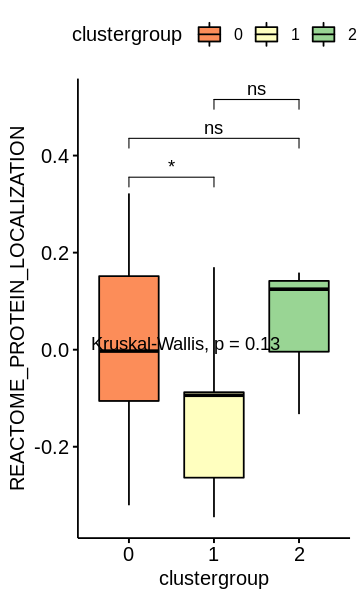

In [23]:
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[5], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.10.pdf',width=3,height=5)

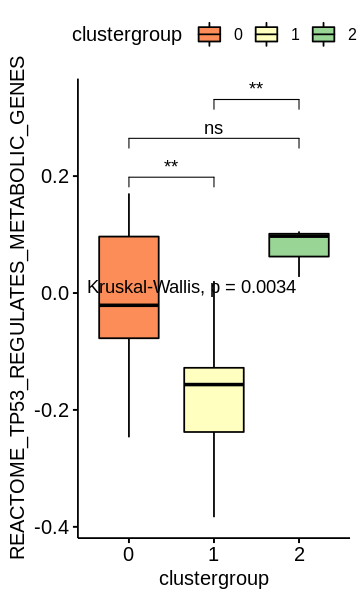

In [24]:
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[3], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.11.pdf',width=3,height=5)

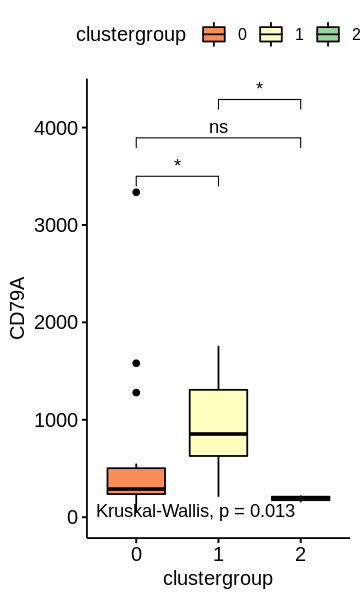

In [25]:
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[8], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.1.pdf',width=3,height=5)

Warning message in wilcox.test.default(c(0, 0, 694.242859635268, 37.3414126849802, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 694.242859635268, 37.3414126849802, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 694.242859635268, 37.3414126849802, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 694.242859635268, 37.3414126849802, :
“cannot compute exact p-value with ties”


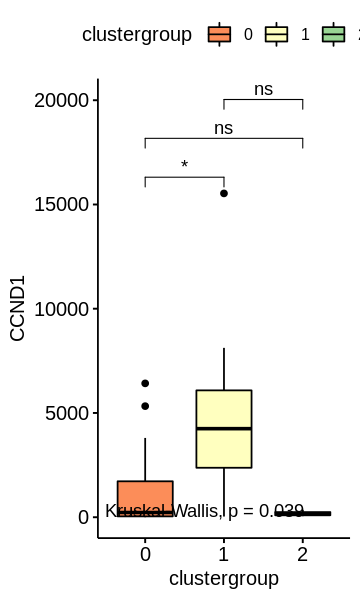

In [26]:
library(ggpubr)
library(RColorBrewer)
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[7], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.2.pdf',width=3,height=5)

Warning message in wilcox.test.default(c(106.335255181533, 408.356679426935, 428.387316397013, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(106.335255181533, 408.356679426935, 428.387316397013, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(4.01229217113768, 6.60894107476314, 5.19784706983692, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(106.335255181533, 408.356679426935, 428.387316397013, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(106.335255181533, 408.356679426935, 428.387316397013, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(4.01229217113768, 6.60894107476314, 5.19784706983692, :
“cannot compute exact p-value with ties”


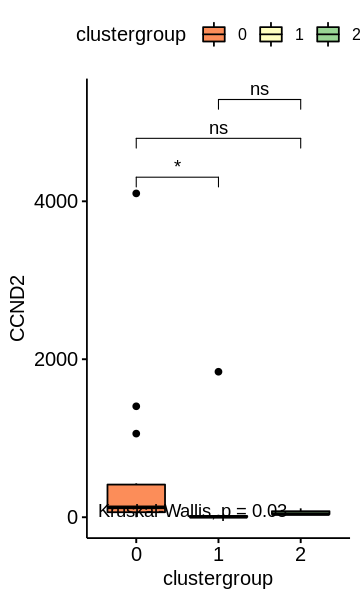

In [27]:
library(ggpubr)
library(RColorBrewer)
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[9], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p
ggsave('fig.5.2.pdf',width=3,height=5)

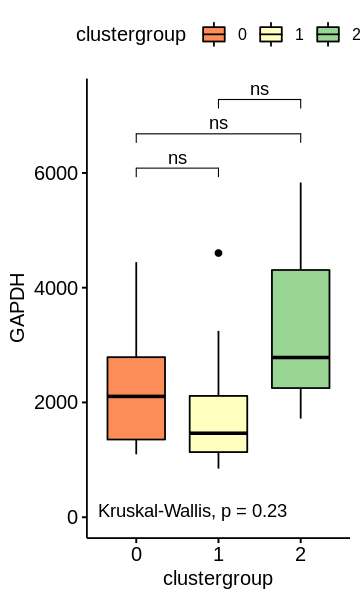

In [28]:
library(ggpubr)
library(RColorBrewer)
p<-ggboxplot(draw3, x="clustergroup", y=colnames(draw3)[10], fill = "clustergroup")+
stat_compare_means(comparisons = my_comparisons, label = "p.signif")+#label这里表示选择显著性标记（星号） +
    stat_compare_means(label.y = 0)+
 scale_fill_brewer(palette='Spectral')

p

In [29]:
annocol<-t(df[c('CCND1','CD79A','CCND2','GAPDH'),])

In [30]:
M<-cor(annocol)

In [31]:
options(repr.plot.height=10,repr.plot.width=10)

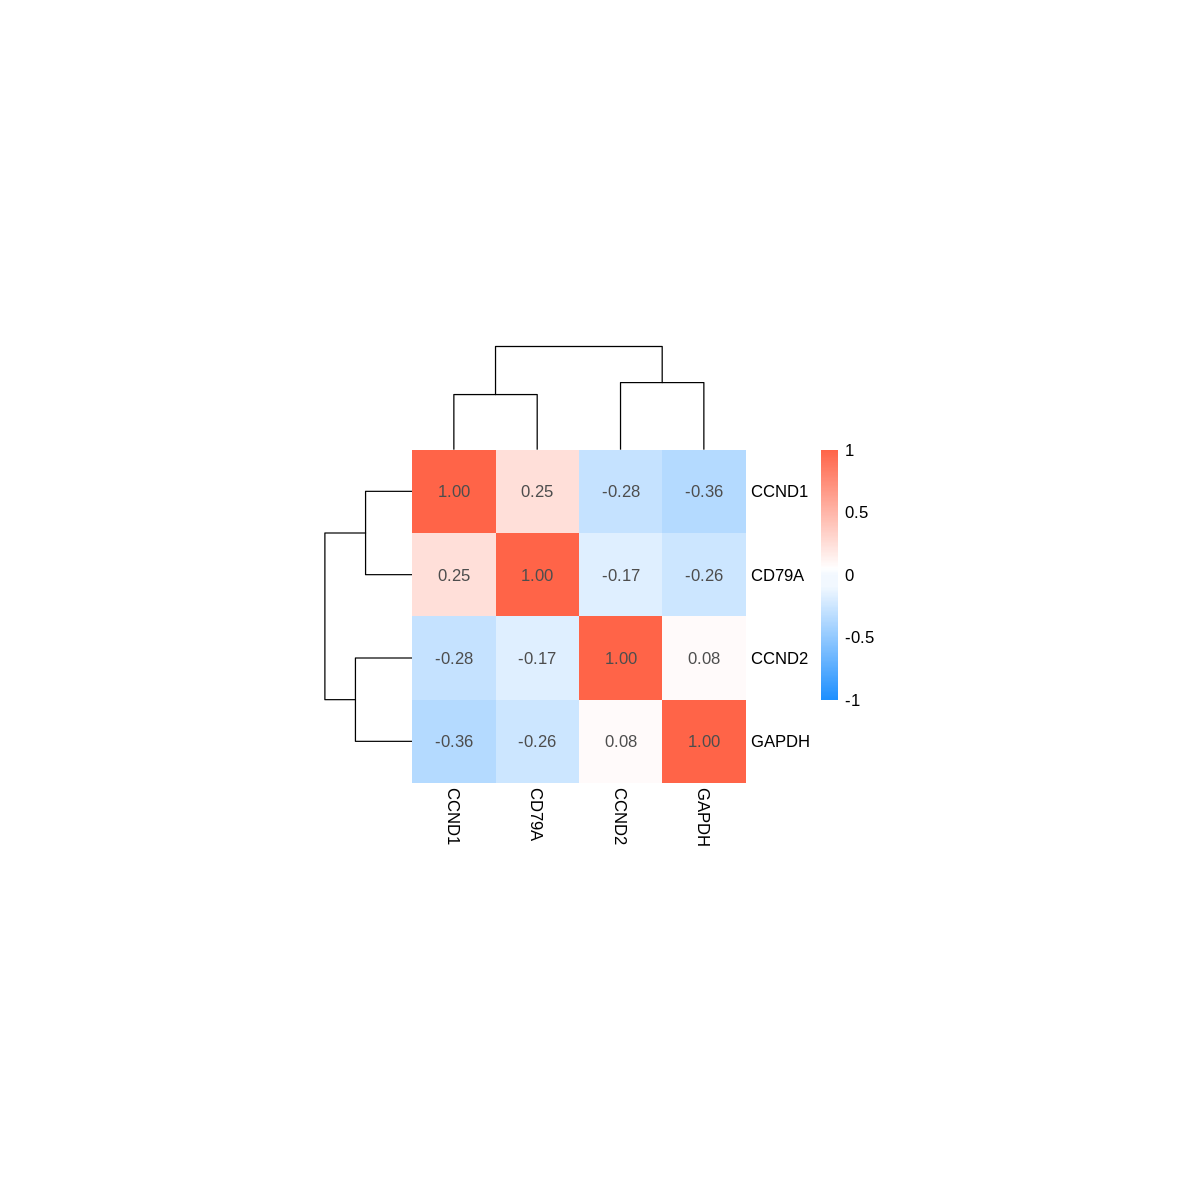

In [32]:
library(pheatmap)
library(ggplot2)
bk <- c(seq(-1,-0.1,by=0.01),seq(0,1,by=0.01))
pheatmap(M,scale='none',display_numbers = TRUE,fontsize_number=10,cluster_col=T,breaks=bk,treeheight_col=60,cluster_row=T,color = colorRampPalette(c("dodgerblue", "white", "tomato"))(length(bk)),border=F,cellwidth=50,cellheight=50)